# Classification: Decision Tree

## Data import

In [1]:
import pandas as pd
df = pd.read_csv('telemarketing_train_preprocess.csv')

In [2]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.991498,-0.146750,-0.571300,0.252494,-0.378985,0.728330,0.745760,0.830517,0.794858,0.429467,...,0,0,0,0,1,0,0,1,0,0
14996,1.172839,-0.440197,6.772887,0.252494,-0.378985,0.910934,0.618604,-0.467378,0.852827,0.901546,...,0,0,0,0,1,0,0,1,0,0
14997,0.084795,-0.446866,0.974844,0.252494,1.366417,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913,...,0,1,0,0,0,0,1,0,0,0
14998,-0.549897,-0.716970,0.201772,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,1,0,0,0,0,0,1,0,0


target
0    11552
1     3448
dtype: int64


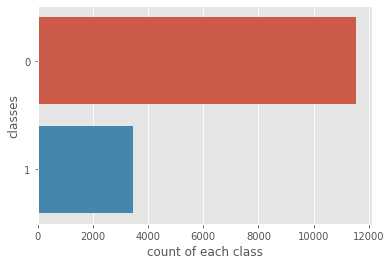

In [3]:
#Print class freq. through pandas 
print(df.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [4]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            15000 non-null  float64
 1   duration                       15000 non-null  float64
 2   campaign                       15000 non-null  float64
 3   pdays                          15000 non-null  float64
 4   previous                       15000 non-null  float64
 5   emp.var.rate                   15000 non-null  float64
 6   cons.price.idx                 15000 non-null  float64
 7   cons.conf.idx                  15000 non-null  float64
 8   euribor3m                      15000 non-null  float64
 9   nr.employed                    15000 non-null  float64
 10  marital_divorced               15000 non-null  int64  
 11  marital_married                15000 non-null  int64  
 12  marital_single                 15000 non-null 

## Data Preparation

### Separate Train/Test sets


In [5]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [6]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(10500, 51) (4500, 51)


## The Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=4, min_samples_leaf=3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# criterion : "gini", "entropy"
# max_depth : The maximum depth of the tree.
# min_samples_split : The minimum number of samples required to split an internal node:
# min_samples_leaf : The minimum number of samples required to be at a leaf node. 

In [10]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3270  196]
 [ 406  628]]


In [12]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,4,5],
              'min_samples_split': [5,10],
              'min_samples_leaf': [2,4]}

In [13]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

In [14]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1953s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    1.7s finished


In [15]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.733283 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.688999 (0.005927) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.688999 (0.005927) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.688999 (0.005927) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.688999 (0.005927) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.716664 (0.006116) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.716664 (0.006116) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.716664 (0.006116) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.716664 (0.006116) with: {'criterion': 'entropy', 'max_dep

In [16]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [17]:
#This is your prediction on the TEST SET
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.7236842105263158


In [19]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3466
           1       0.76      0.69      0.72      1034

    accuracy                           0.88      4500
   macro avg       0.83      0.81      0.82      4500
weighted avg       0.88      0.88      0.88      4500



In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3239  227]
 [ 319  715]]


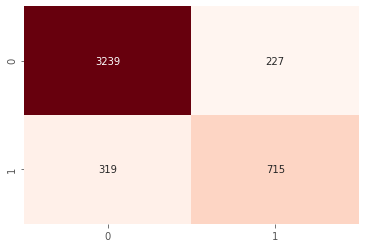

In [21]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

#annot=True to annotate cells fmt: format


### ROC Curve

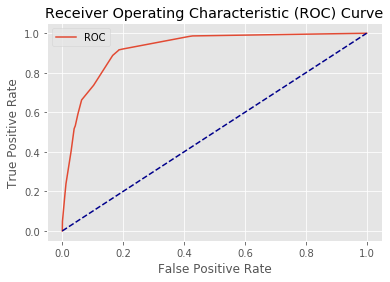

AUC: 0.92


In [22]:
from sklearn import metrics
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4, min_samples_split=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Plotting the tree 

In [23]:
X_train.columns.tolist()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [24]:
from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)



|--- nr.employed <= -0.89
|   |--- duration <= -0.46
|   |   |--- pdays <= -3.93
|   |   |   |--- campaign <= 0.01
|   |   |   |   |--- class: 1
|   |   |   |--- campaign >  0.01
|   |   |   |   |--- class: 0
|   |   |--- pdays >  -3.93
|   |   |   |--- duration <= -0.68
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  -0.68
|   |   |   |   |--- class: 0
|   |--- duration >  -0.46
|   |   |--- pdays <= -1.81
|   |   |   |--- duration <= 0.65
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  0.65
|   |   |   |   |--- class: 1
|   |   |--- pdays >  -1.81
|   |   |   |--- duration <= -0.16
|   |   |   |   |--- class: 1
|   |   |   |--- duration >  -0.16
|   |   |   |   |--- class: 1
|--- nr.employed >  -0.89
|   |--- duration <= 0.59
|   |   |--- cons.conf.idx <= -1.28
|   |   |   |--- duration <= -0.68
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  -0.68
|   |   |   |   |--- class: 0
|   |   |--- cons.conf.idx >  -1.28
|   |   |   |--- duration <= -0.25
|  

[Text(167.4, 195.696, 'X[9] <= -0.886\nentropy = 0.778\nsamples = 10500\nvalue = [8086, 2414]'),
 Text(83.7, 152.208, 'X[1] <= -0.462\nentropy = 0.933\nsamples = 1798\nvalue = [627, 1171]'),
 Text(41.85, 108.72, 'X[3] <= -3.931\nentropy = 0.861\nsamples = 461\nvalue = [330, 131]'),
 Text(20.925, 65.232, 'X[2] <= 0.009\nentropy = 0.947\nsamples = 85\nvalue = [31, 54]'),
 Text(10.4625, 21.744, 'entropy = 0.866\nsamples = 73\nvalue = [21, 52]'),
 Text(31.387500000000003, 21.744, 'entropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(62.775000000000006, 65.232, 'X[1] <= -0.679\nentropy = 0.731\nsamples = 376\nvalue = [299, 77]'),
 Text(52.3125, 21.744, 'entropy = 0.371\nsamples = 126\nvalue = [117, 9]'),
 Text(73.2375, 21.744, 'entropy = 0.844\nsamples = 250\nvalue = [182, 68]'),
 Text(125.55000000000001, 108.72, 'X[3] <= -1.814\nentropy = 0.764\nsamples = 1337\nvalue = [297, 1040]'),
 Text(104.625, 65.232, 'X[1] <= 0.654\nentropy = 0.415\nsamples = 442\nvalue = [37, 405]'),
 Text(94.1625

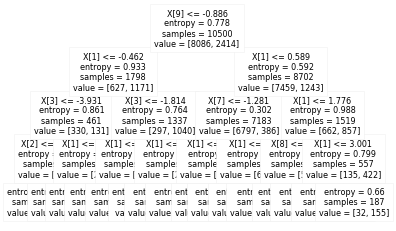

In [25]:
tree.plot_tree(model, fontsize=8)

In [27]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='decision_tree.dot', feature_names = X_test.columns.tolist())

In [28]:
!dot -Tpng decision_tree.dot -o decision_tree.png -Gdpi=600

In [29]:
from IPython.display import Image
Image(filename = 'decision_tree.png')

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=6, min_samples_split=4, min_samples_leaf=2)
rand_forest.fit(X, y)

y_pred = rand_forest.predict(X_test)



In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      3466
           1       0.77      0.50      0.60      1034

    accuracy                           0.85      4500
   macro avg       0.82      0.73      0.76      4500
weighted avg       0.84      0.85      0.84      4500



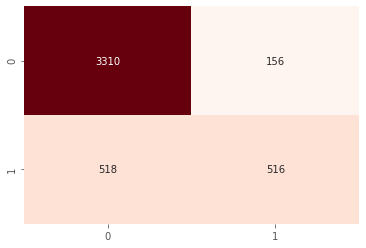

In [32]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

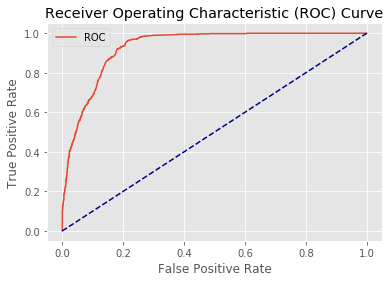

AUC: 0.93


In [33]:
# ROC curve

from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)